# Ch.02 The mathematical building blocks of neural networks

이 장에서는 다음 내용을 다룹니다.

* 신경망의 첫 번째 예시
* 텐서와 텐서 연산
* 역전파와 경사 하강법을 통한 신경망의 학습 방식

딥러닝을 이해하려면 텐서, 텐서 연산, 미분, 경사 하강법 등과 같은 기본적인 수학적 개념에 대한 이해가 필요합니다. 이 장에서는 지나치게 전문적인 내용에 치우치지 않고 이러한 개념에 대한 직관을 키우는 데 중점을 둘 것입니다. 특히 수학적 배경지식이 없는 사람들에게 불필요한 장벽이 될 수 있고, 설명에 꼭 필요한 것도 아닌 수학적 표기법은 최대한 사용하지 않을 것입니다. 수학적 연산에 대한 가장 정확하고 명확한 설명은 실행 가능한 코드입니다.

텐서와 경사 하강법을 소개하기 위한 충분한 맥락을 제공하기 위해, 먼저 신경망의 실제 예시를 살펴보겠습니다. 그런 다음 소개된 모든 새로운 개념을 하나씩 자세히 설명하겠습니다. 이러한 개념들은 앞으로 나올 예시들을 이해하는 데 필수적이라는 점을 기억하세요!

이 장을 읽고 나면 딥러닝의 수학적 이론을 직관적으로 이해하게 될 것이며, 3장에서 다룰 최신 딥러닝 프레임워크를 본격적으로 학습할 준비가 될 것입니다.

**이 책의 코드 실행하기**

이 책에는 실행 가능한 파이썬 코드가 가득합니다. 각 장에는 해당 장의 모든 코드가 포함된 Jupyter Notebook이 함께 제공됩니다. Jupyter Notebook은 코드를 실행하고, 데이터를 그래프로 나타내고, 이미지를 보고, 다양한 작업을 할 수 있는 실시간 파이썬 스크래치패드와 같은 도구입니다. 책을 읽으면서 코드를 실행하고 직접 실험해 보면 훨씬 더 실질적인 지식을 얻을 수 있을 것입니다.

이러한 Notebook을 실행하기 위한 딥러닝 환경을 설정하는 가장 쉬운 방법은 Google Colaboratory(줄여서 Colab)를 사용하는 것입니다. Colab은 Jupyter Notebook을 위한 호스팅 환경으로, 머신러닝 실무자들에게 업계 표준으로 자리 잡았습니다. Colab을 사용하면 브라우저에서 이 책의 코드를 대화형으로 실행하고, 구성 가능한 하드웨어를 통해 클라우드 런타임에 연결할 수 있습니다. 기본적으로 이 책의 Notebook은 Colab의 무료 GPU 런타임에서 실행됩니다.

원하신다면 이 노트북을 여러분의 컴퓨터에서 로컬로 실행해 보실 수도 있습니다. 특히 이 책 후반부에 나오는 더 크고 연산 집약적인 모델을 다룰 때는 GPU 사용을 권장합니다.

로컬 및 Colab에서 실행하는 방법과 코드는 https://github.com/fchollet/deep-learning-with-python-notebooks 에서 확인하실 수 있습니다.

## A first look at a neural network
머신러닝 라이브러리인 Keras를 사용하여 손글씨 숫자를 분류하는 신경망의 구체적인 예제를 살펴보겠습니다. 이 책 전체에서 Keras를 광범위하게 사용할 것입니다. Keras는 간단하고 수준 높은 라이브러리이므로 다루고자 하는 개념에 집중할 수 있도록 도와줍니다.

Keras 또는 유사한 라이브러리에 대한 경험이 없다면 이 첫 번째 예제를 바로 이해하지 못할 수도 있습니다. 괜찮습니다. 몇 섹션에 걸쳐 예제의 각 요소를 자세히 설명할 것입니다. 따라서 일부 단계가 임의적이거나 마법처럼 보이더라도 걱정하지 마세요! 모든 것은 시작이 필요합니다.

여기서 해결하려는 문제는 손글씨 숫자의 회색조 이미지(28 × 28 픽셀)를 10가지 범주(0부터 9까지)로 분류하는 것입니다. 머신러닝 분야의 고전이자 오랜 역사를 자랑하며 집중적으로 연구되어 온 MNIST 데이터셋을 사용하겠습니다. MNIST는 1980년대 미국 국립표준기술연구소(NIST)에서 구축한 6만 개의 훈련 이미지와 1만 개의 테스트 이미지로 구성된 데이터셋입니다. MNIST를 "해결"하는 것은 딥러닝의 "Hello World"와 같다고 생각할 수 있습니다. 즉, 알고리즘이 예상대로 작동하는지 검증하는 과정입니다. 머신러닝 실무자가 되면 과학 논문, 블로그 게시물 등에서 MNIST를 자주 접하게 될 것입니다. 그림 2.1에서 MNIST 샘플의 일부를 볼 수 있습니다.

머신러닝에서 분류 문제의 범주는 **클래스**라고 합니다. 데이터 포인트는 **샘플**이라고 하며, 특정 샘플에 연결된 클래스는 **레이블**이라고 합니다.

<img src="https://deeplearningwithpython.io/images/ch02/MNIST-sample-digits.3d651e1d.png" width="300"><p style="text-align:center">Figure 2.1 MNIST sample digits</p>

MNIST 데이터셋은 Keras에 4개의 NumPy 배열 형태로 미리 로드되어 있습니다.

**Loading the MNIST dataset in Keras**

In [10]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images`와 `train_labels`는 모델이 학습할 데이터인 훈련 세트를 구성합니다. 모델은 학습된 데이터를 사용하여 테스트 세트인 `test_images`와 `test_labels`로 테스트됩니다. 이미지는 NumPy 배열로 인코딩되어 있으며, 레이블은 0부터 9까지의 숫자로 이루어진 배열입니다. 이미지와 레이블은 일대일로 대응합니다.

NumPy는 수치 계산을 위한 매우 인기 있는 Python 라이브러리입니다. 머신 러닝을 배우는 과정에서 자주 접하게 될 것입니다. GPU 및 자동 미분 지원이 부족하여 최신 머신 러닝 알고리즘을 구현하는 데는 잘 사용되지 않지만, NumPy 배열은 MNIST 숫자와 레이블처럼 수치 데이터 교환 형식으로 자주 사용됩니다.

이제 훈련 데이터를 살펴보겠습니다.

In [91]:
train_images.shape

(60000, 28, 28)

In [92]:
len(train_labels)

60000

In [93]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [94]:
test_images.shape

(10000, 28, 28)

In [95]:
len(test_labels)

10000

In [96]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

워크플로는 다음과 같습니다. 먼저, 신경망에 훈련 데이터인 train_images와 train_labels를 입력합니다. 그러면 신경망은 이미지와 레이블을 연결하는 방법을 학습합니다. 마지막으로, 신경망에게 test_images에 대한 예측을 생성하도록 요청하고, 이 예측이 test_labels의 레이블과 일치하는지 확인합니다.

이제 신경망을 구축해 보겠습니다. 다시 한번 말씀드리지만, 이 예제의 모든 내용을 아직 이해할 필요는 없습니다.

In [14]:
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

신경망의 핵심 구성 요소는 레이어입니다. 레이어는 데이터를 걸러내는 필터라고 생각할 수 있습니다. 일부 데이터가 입력되면 더 유용한 형태로 출력됩니다. 구체적으로, 레이어는 입력된 데이터에서 표현을 추출하는데, 이러한 표현은 주어진 문제에 더 의미 있는 표현이 되기를 바랍니다. 딥러닝의 대부분은 일련의 레이어를 연결하여 점진적인 데이터 정제 과정을 구현하는 것으로 구성됩니다. 딥러닝 모델은 데이터 처리를 위한 체와 같으며, 점점 더 정교해지는 데이터 필터(레이어)의 연속으로 이루어져 있습니다.

여기서 우리의 모델은 두 개의 Dense 레이어로 구성되어 있는데, 이 레이어들은 완전 연결(또는 밀집 연결)된 신경망 레이어입니다. 두 번째(그리고 마지막) 레이어는 10방향 소프트맥스 분류 레이어로, 10개의 확률 점수(합이 1인)로 이루어진 배열을 반환합니다. 각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률을 나타냅니다.

모델을 학습 준비 상태로 만들기 위해 컴파일 단계에서 세 가지를 더 선택해야 합니다.

* 손실 함수 - 모델이 학습 데이터에서 성능을 측정하고 올바른 방향으로 나아갈 수 있도록 하는 방법입니다.
* 옵티마이저 - 모델이 학습 데이터를 기반으로 성능을 개선하기 위해 스스로를 업데이트하는 메커니즘입니다.
* 학습 및 테스트 중 모니터링할 지표 - 여기서는 정확도(올바르게 분류된 이미지의 비율)에만 중점을 둡니다.

손실 함수와 옵티마이저의 정확한 목적은 다음 두 장에서 자세히 설명하겠습니다.

In [17]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

학습을 시작하기 전에, 모델이 예상하는 형태로 데이터를 재구성하고 모든 값이 [0, 1] 범위에 있도록 스케일링하여 데이터를 전처리합니다. 이전에는 학습 이미지가 [0, 255] 범위의 값을 가진 (60000, 28, 28) 형태의 uint8 배열에 저장되어 있었습니다. 이를 0에서 1 사이의 값을 가진 (60000, 28, 28) 형태의 float32 배열로 변환합니다.

In [20]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

이제 모델을 학습시킬 준비가 되었습니다. Keras에서는 모델의 `fit()` 메서드를 호출하여 모델을 학습 데이터에 맞추는 방식으로 학습을 진행합니다.

In [22]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8676 - loss: 0.4666
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9674 - loss: 0.1125
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9810 - loss: 0.0700
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9863 - loss: 0.0476
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9890 - loss: 0.0375


학습 과정에서는 두 가지 수치가 표시됩니다. 하나는 학습 데이터에 대한 모델의 손실이고, 다른 하나는 학습 데이터에 대한 모델의 정확도입니다. 학습 데이터에서 빠르게 0.989(98.9%)의 정확도를 달성합니다.

이제 학습된 모델을 사용하여 새로운 숫자 이미지, 즉 테스트 세트의 이미지(학습 데이터에 포함되지 않은 이미지)에 대한 클래스 확률을 예측할 수 있습니다.

In [25]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([3.0898493e-06, 3.0219181e-07, 2.5367213e-05, 4.5663276e-04,
       3.0108684e-09, 7.2258615e-07, 8.7271013e-10, 9.9948823e-01,
       5.1107777e-06, 2.0600324e-05], dtype=float32)

해당 배열의 인덱스 i는 숫자 이미지 test_digits[0]가 클래스 i에 속할 확률에 해당합니다.

첫 번째 테스트 숫자는 인덱스 7에서 가장 높은 확률 점수(0.99999106, 거의 1)를 가지므로, 우리 모델에 따르면 이는 7이어야 합니다.

In [28]:
predictions[0].argmax()

7

In [30]:
predictions[0][7]

0.99948823

테스트 라벨이 일치하는지 확인할 수 있습니다.

In [33]:
test_labels[0]

7

평균적으로 우리 모델은 이처럼 이전에 본 적 없는 숫자를 얼마나 잘 분류할까요? 전체 테스트 세트에 대한 평균 정확도를 계산하여 확인해 보겠습니다.

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9711 - loss: 0.0884
test_acc: 0.9749000072479248


평균적으로, 우리 모델은 이전에 본 적 없는 숫자를 얼마나 잘 분류할까요? 전체 테스트 세트에 대한 평균 정확도를 계산해 보겠습니다. 테스트 세트의 정확도는 97.8%로, 훈련 세트의 정확도(98.9%)보다 거의 두 배나 높습니다. 훈련 정확도와 테스트 정확도 사이의 이러한 차이는 과적합의 한 예입니다. 과적합이란 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 떨어지는 경향을 말합니다. 과적합은 5장에서 중점적으로 다루는 주제입니다.

이것으로 첫 번째 예제를 마칩니다. 15줄도 안 되는 파이썬 코드로 손글씨 숫자를 분류하는 신경망을 구축하고 훈련시키는 방법을 방금 살펴보았습니다. 이번 장과 다음 장에서는 방금 살펴본 각 구성 요소에 대해 자세히 알아보고 그 이면에 어떤 일이 일어나는지 명확히 설명하겠습니다. 모델에 사용되는 데이터 저장 객체인 텐서, 레이어를 구성하는 텐서 연산, 그리고 모델이 훈련 예제를 통해 학습할 수 있도록 하는 경사 하강법에 대해 배우게 될 것입니다.

## 신경망을 위한 데이터 표현

이전 예제에서는 다차원 NumPy 배열(텐서라고도 함)에 저장된 데이터로 시작했습니다. 일반적으로 현재 모든 머신러닝 시스템은 텐서를 기본 데이터 구조로 사용합니다. 텐서는 이 분야의 핵심 요소이며, TensorFlow 프레임워크의 이름도 여기서 유래했을 정도입니다. 그렇다면 텐서란 무엇일까요?

텐서는 본질적으로 데이터, 주로 수치 데이터를 담는 컨테이너입니다. 즉, 숫자를 담는 컨테이너입니다. 행렬은 2차원 텐서로, 텐서는 행렬을 임의의 차원으로 확장한 것입니다(텐서에서 차원은 종종 축이라고 불립니다).

텐서에 대한 자세한 설명은 처음에는 다소 추상적으로 느껴질 수 있습니다. 하지만 머신러닝 코드를 작성할 때 텐서를 다루는 것은 매우 중요한 부분이므로, 그 중요성을 잘 알아두는 것이 좋습니다.

### 스칼라(rank-0 텐서)

숫자 하나만 포함하는 텐서를 스칼라(또는 스칼라 텐서, 랭크 0 텐서, 0D 텐서)라고 합니다. NumPy에서 float32 또는 float64 숫자는 스칼라 텐서(또는 스칼라 배열)입니다. NumPy 텐서의 축 개수는 `ndim` 속성을 통해 확인할 수 있습니다. 스칼라 텐서는 축이 0개입니다(ndim == 0). 텐서의 축 개수를 랭크라고도 합니다. 다음은 NumPy 스칼라의 예입니다.

### Scalars (rank-0 tensors)

In [76]:
import numpy as np
x = np.array(12)
x

array(12)

In [115]:
x.ndim

0

### Vectors (rank-1 tensors)
숫자 배열을 벡터(또는 랭크-1 텐서 또는 1차원 텐서)라고 합니다. 랭크-1 텐서는 정확히 하나의 축을 가집니다. 다음은 NumPy 벡터의 예입니다.

In [116]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [117]:
x.ndim

1

이 벡터는 다섯 개의 요소를 가지고 있으므로 5차원 벡터라고 합니다. 5차원 벡터와 5차원 텐서를 혼동하지 마세요! 5차원 벡터는 하나의 축만 가지고 있으며 그 축을 따라 다섯 개의 차원을 가지는 반면, 5차원 텐서는 다섯 개의 축을 가지며 각 축을 따라 임의의 차원을 가질 수 있습니다. 차원은 특정 축을 따라 있는 요소의 개수(우리 5차원 벡터의 경우처럼) 또는 텐서의 축의 개수(5차원 텐서처럼)를 나타낼 수 있는데, 이 때문에 혼동이 생길 수 있습니다. 후자의 경우, 엄밀히 말하면 5차 텐서(텐서의 차수는 축의 개수)라고 하는 것이 더 정확하지만, 모호한 표현인 5차원 텐서라는 용어가 흔히 사용됩니다.

### Matrices (rank-2 tensors)

벡터 배열은 행렬(또는 2차 텐서 또는 2차원 텐서)입니다. 행렬은 두 개의 축(흔히 행과 열이라고 함)을 가지고 있습니다. 행렬은 숫자로 이루어진 직사각형 격자로 시각적으로 해석할 수 있습니다. 다음은 NumPy 행렬의 예입니다.

In [118]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

첫 번째 축의 항목을 행이라고 하고, 두 번째 축의 항목을 열이라고 합니다. 앞의 예에서 [5, 78, 2, 34, 0]은 x의 첫 번째 행이고, [5, 6, 7]은 첫 번째 열입니다.

### Rank-3 and higher-rank tensors

이러한 행렬들을 새로운 배열에 담으면 3차 텐서(또는 3D 텐서)를 얻게 되는데, 이는 시각적으로 숫자의 세제곱으로 해석할 수 있습니다. 다음은 NumPy로 표현한 3차 텐서의 예입니다.

In [119]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

3차 텐서를 배열에 담으면 4차 텐서를 만들 수 있고, 이런 식으로 계속 진행할 수 있습니다. 딥러닝에서는 일반적으로 0~4차 텐서를 다루지만, 비디오 데이터를 처리하는 경우에는 5차 텐서까지 사용할 수도 있습니다.

### Key attributes(주요 속성)

텐서는 다음 세 가지 주요 속성으로 정의됩니다.

*  개수(랭크) — 예를 들어, 랭크 3 텐서는 세 개의 축을 가지며, 행렬은 두 개의 축을 가집니다. NumPy, JAX, TensorFlow, PyTorch와 같은 Python 라이브러리에서는 이를 텐서의 `ndim`이라고도 합니다.
* 모양 — 각 축을 따라 텐서가 가지는 차원의 수를 나타내는 정수 튜플입니다. 예를 들어, 앞의 행렬 예제는 모양이 (3, 5)이고, 랭크 3 텐서 예제는 모양이 (3, 3, 5)입니다. 벡터는 (5,)와 같이 단일 요소를 가진 모양을 가지는 반면, 스칼라는 빈 모양인 `()`을 가집니다.
* 데이터 유형(Python 라이브러리에서는 일반적으로 `dtype`이라고 함) — 텐서에 포함된 데이터의 유형입니다. 예를 들어, 텐서의 유형은 float16, float32, float64, uint8, bool 등이 될 수 있습니다. TensorFlow에서는 문자열 텐서도 접하게 될 

것입니다.
이를 좀 더 구체적으로 설명하기 위해 MNIST 예제에서 처리했던 데이터를 다시 살펴보겠습니다. 먼저 MNIST 데이터셋을stand tensors

In [120]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

다음으로, train_images 텐서의 축 개수인 ndim 속성을 표시합니다.

In [121]:
train_images.ndim

3

모양은 다음과 같습니다.

In [122]:
train_images.shape

(60000, 28, 28)

그리고 이것이 바로 데이터 유형, 즉 dtype 속성입니다.

In [123]:
train_images.dtype

dtype('uint8')

여기서 우리는 8비트 정수로 이루어진 3차 텐서를 가지고 있습니다. 더 정확히 말하면, 28×28 크기의 정수 행렬 6만 개가 배열된 것입니다. 각 행렬은 0에서 255 사이의 계수를 가진 회색조 이미지입니다.

이제 표준 과학 파이썬 패키지에 포함된 Matplotlib 라이브러리를 사용하여 이 3차 텐서의 네 번째 자릿수를 표시해 보겠습니다. 그림 2.2를 참조하십시오.

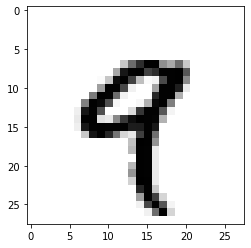

In [80]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

당연히 해당 레이블은 정수 9입니다.

In [81]:
train_labels[4]

9

### Manipulating tensors in NumPy (NumPy에서 텐서 조작하기)

이전 예제에서는 `train_images[i]` 구문을 사용하여 첫 번째 축을 따라 특정 숫자를 선택했습니다. 텐서에서 특정 요소를 선택하는 것을 텐서 슬라이싱이라고 합니다. NumPy 배열에서 수행할 수 있는 텐서 슬라이싱 연산을 살펴보겠습니다.

다음 예제는 10부터 100까지의 숫자(100은 제외)를 선택하여 (90, 28, 28) 형태의 배열에 저장합니다.

In [82]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

이는 각 텐서 축을 따라 슬라이스의 시작 인덱스와 종료 인덱스를 지정하는 보다 자세한 표기법과 동일합니다. 참고로, 콜론(:)은 전체 축을 선택하는 것과 같습니다.


In [83]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [84]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

일반적으로 각 텐서 축을 따라 임의의 두 인덱스 사이의 영역을 선택할 수 있습니다. 예를 들어 모든 이미지의 오른쪽 하단 모서리에 있는 14×14 픽셀 영역을 선택하려면 다음과 같이 하면 됩니다.

In [85]:
my_slice = train_images[:, 14:, 14:]

음수 인덱스를 사용하는 것도 가능합니다. 파이썬 리스트의 음수 인덱스와 마찬가지로, 현재 축의 끝을 기준으로 한 상대적인 위치를 나타냅니다. 이미지를 가운데를 중심으로 14×14 픽셀 크기의 패치로 자르려면 다음과 같이 하면 됩니다.

In [86]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

일반적으로 딥러닝에서 접하게 되는 모든 데이터 텐서의 첫 번째 축(인덱싱이 0부터 시작하기 때문에 축 0)은 샘플 축입니다. MNIST 예시에서 "샘플"은 숫자 이미지입니다.

또한 딥러닝 모델은 전체 데이터셋을 한 번에 처리하는 것이 아니라, 데이터를 고정된 크기의 작은 "배치", 즉 샘플 그룹으로 나누어 처리합니다. 구체적으로, 배치 크기가 128인 MNIST 숫자 배치 하나는 다음과 같습니니다.

In [87]:
batch = train_images[:128]

다음은 그 다음 "배치"입니다.

In [88]:
batch = train_images[128:256]

그리고 n번째 배치:

In [89]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

이러한 배치 텐서를 고려할 때, 첫 번째 축(0번째 축)을 배치 축(또는 배치 차원)이라고 합니다. 케라스(Keras) 및 기타 딥러닝 라이브러리를 사용할 때 이 용어를 자주 접하게 될 것입니다.

### Real-world examples of data tensors

나중에 접하게 될 예시와 유사한 몇 가지 예제를 통해 데이터 텐서를 좀 더 구체적으로 살펴보겠습니다. 여러분이 다루게 될 데이터는 거의 항상 다음 범주 중 하나에 속합니다.

* 벡터 데이터 — (샘플, 특징) 형태의 2차 텐서로, 각 샘플은 숫자 속성("특징")의 벡터입니다.
* 시계열 데이터 또는 시퀀스 데이터 — (샘플, 타임스텝, 특징) 형태의 3차 텐서로, 각 샘플은 특징 벡터들의 시퀀스(길이는 타임스텝)입니다.
* 이미지 — (샘플, 높이, 너비, 채널) 형태의 4차 텐서로, 각 샘플은 픽셀로 이루어진 2차원 그리드이며, 각 픽셀은 값("채널")의 벡터로 표현됩니다.
* 비디오 — (샘플, 프레임, 높이, 너비, 채널) 형태의 5차 텐서로, 각 샘플은 이미지들의 시퀀스(길이는 프레임)입니다.

### Vector data
벡터 데이터는 가장 흔한 경우 중 하나입니다. 이러한 데이터셋에서는 각 데이터 포인트를 벡터로 인코딩할 수 있으며, 따라서 데이터 배치는 2차원 텐서(즉, 벡터 배열)로 인코딩됩니다. 여기서 첫 번째 축은 샘플 축이고 두 번째 축은 특징 축입니다.

두 가지 예를 살펴보겠습니다.

* 첫째, 사람들의 나이, 성별, 소득을 고려하는 보험 통계 데이터셋입니다. 각 사람은 세 가지 값으로 이루어진 벡터로 특징지어질 수 있으므로, 10만 명의 전체 데이터셋은 (100000, 3) 형태의 2차원 텐서에 저장할 수 있습니다.

* 둘째, 2만 개의 공통 단어로 구성된 사전에서 각 단어가 문서에 나타나는 횟수로 각 문서를 나타내는 텍스트 문서 데이터셋입니다. 각 문서는 20,000개의 값(사전에 있는 단어당 하나의 카운트)으로 이루어진 벡터로 인코딩될 수 있으므로 500개의 문서로 구성된 전체 데이터 세트는 (500, 20000) 형태의 텐서에 저장될 수 있습니다.

### Timeseries data or sequence data

데이터에서 시간(또는 순서)이 중요한 경우, 명시적인 시간 축을 가진 3차 텐서에 저장하는 것이 합리적입니다. 각 샘플은 벡터 시퀀스(2차 텐서)로 인코딩될 수 있으므로, 데이터 배치는 3차 텐서로 인코딩됩니다(그림 2.3 참조).


<img src="https://deeplearningwithpython.io/images/ch02/timeseries_data.a711cc5a.png" width="350"><p style="text-align:center">Figure 2.3 A rank-3 timeseries data tensor</p>

관례상 시간 축은 항상 두 번째 축(인덱스 1의 축)입니다. 몇 가지 예를 살펴보겠습니다.

* 주식 가격 데이터셋의 경우, 매분마다 현재 주가, 지난 1분 동안의 최고가, 그리고 지난 1분 동안의 최저가를 저장합니다. 따라서 매분은 3차원 벡터로 인코딩되고, 하루 거래량은 (390, 3) 형태의 행렬(하루 거래 시간은 390분)로 인코딩되며, 250일치의 데이터는 (250, 390, 3) 형태의 3차 텐서에 저장할 수 있습니다. 여기서 각 샘플은 하루치 데이터를 나타냅니다.
* 트윗 데이터셋의 경우, 각 트윗은 128개의 고유 문자로 이루어진 알파벳에서 추출한 280개의 문자로 구성된 시퀀스로 인코딩됩니다. 이 경우, 각 문자는 128 크기의 이진 벡터(해당 문자에 해당하는 인덱스의 항목 하나만 1이고 나머지는 모두 0인 벡터)로 인코딩될 수 있습니다. 그러면 각 트윗은 (280, 128) 형태의 랭크-2 텐서로 인코딩될 수 있고, 100만 개의 트윗 데이터셋은 (1000000, 280, 128) 벡터의 텐서(랭크-2 텐서)에 저장될 수 있으므로 데이터 배치는 랭크-3 텐서로 인코딩됩니다(그림 2.3 참조).

### Image data
이미지는 일반적으로 높이, 너비, 색상 깊이의 세 가지 차원을 가집니다. 회색조 이미지(MNIST 숫자 이미지처럼)는 단일 색상 채널만 가지므로 2차원 텐서에 저장할 수 있지만, 관례적으로 이미지 텐서는 항상 3차원이며 회색조 이미지의 경우 1차원 색상 채널을 사용합니다. 따라서 256 × 256 크기의 회색조 이미지 128개는 (128, 256, 256, 1) 형태의 텐서에 저장할 수 있고, 컬러 이미지 128개는 (128, 256, 256, 3) 형태의 텐서에 저장할 수 있습니다(그림 2.4 참조).

<img src="https://deeplearningwithpython.io/images/ch02/image_data.8accee38.png" width="350"><p style="text-align:center">Figure 2.4 A rank-4 image data tensor</p>

이미지 텐서의 형태에는 두 가지 규칙이 있습니다. 하나는 채널을 마지막에 배치하는 규칙(JAX, TensorFlow 및 대부분의 딥러닝 도구에서 표준)이고, 다른 하나는 채널을 먼저 배치하는 규칙(PyTorch에서 표준)입니다.

채널 마지막 규칙에서는 색상-깊이 축이 맨 끝에 위치합니다((샘플, 높이, 너비, 색상 깊이)). 반면, 채널 우선 규칙에서는 색상-깊이 축이 배치 축 바로 뒤에 위치합니다((샘플, 색상 깊이, 높이, 너비)). 채널 우선 규칙을 사용하면 앞의 예시는 (128, 1, 256, 256)과 (128, 3, 256, 256)이 됩니다. Keras API는 두 가지 형식 모두를 지원합니다.

### Video data
비디오 데이터는 5차 텐서가 필요한 몇 안 되는 실제 데이터 유형 중 하나입니다. 비디오는 각 프레임이 컬러 이미지인 프레임들의 시퀀스로 이해할 수 있습니다. 각 프레임은 3차 텐서(높이, 너비, 색상 깊이)에 저장할 수 있으므로, 프레임들의 시퀀스는 4차 텐서(프레임, 높이, 너비, 색상 깊이)에 저장할 수 있고, 따라서 여러 개의 비디오로 구성된 배치(batch)는 (샘플, 프레임, 높이, 너비, 색상 깊이) 형태의 5차 텐서에 저장할 수 있습니다.

예를 들어, 60초 길이의 144 × 256 크기 YouTube 비디오 클립을 초당 4프레임으로 샘플링하면 총 240개의 프레임이 생성됩니다. 이러한 비디오 클립 4개를 배치로 저장하면 (4, 240, 144, 256, 3) 형태의 텐서에 저장됩니다. 이는 총 106,168,320개의 값에 해당합니다! 텐서의 데이터 타입이 float32라면 각 값은 32비트로 저장되므로 텐서의 크기는 425MB에 달합니다. 엄청나게 크죠! 우리가 실제로 접하는 동영상은 float32로 저장되지 않고 MPEG 포맷처럼 높은 압축률을 사용하기 때문에 훨씬 가볍습니다.

## The gears of neural networks: tensor operations

모든 컴퓨터 프로그램이 궁극적으로 이진 입력에 대한 몇 가지 이진 연산(AND, OR, NOR 등)으로 축소될 수 있는 것처럼, 심층 신경망이 학습하는 모든 변환은 숫자 데이터 텐서에 적용되는 몇 가지 텐서 연산(또는 텐서 함수)으로 축소될 수 있습니다. 예를 들어, 텐서를 더하거나 곱하는 등의 연산이 가능합니다.

초기 예제에서는 Dense 레이어를 쌓아 모델을 구축했습니다. Keras 레이어 인스턴스는 다음과 같습니다.

> keras.layers.Dense(512, activation="relu")

이 레이어는 입력으로 행렬을 받아 입력 텐서에 대한 새로운 표현인 또 다른 행렬을 반환하는 함수로 해석할 수 있습니다. 구체적으로, 함수는 다음과 같습니다(여기서 W는 행렬이고 b는 벡터이며, 둘 다 레이어의 속성입니다).

> output = relu(matmul(input, W) + b)

이것을 자세히 살펴보겠습니다. 여기에는 세 가지 텐서 연산이 있습니다.

> 입력 텐서와 W라는 이름의 텐서 간의 텐서 곱(matmul) 연산
결과 행렬과 벡터 b 간의 덧셈(+) 연산
relu 연산: relu(x)는 max(x, 0)입니다. "relu"는 "정류 선형 단위(REctified Linear Unit)"의 약자입니다.
이 섹션은 전적으로 선형 대수 표현식을 다루지만, 이 책에서는 수학적 표기법을 찾아볼 수 없습니다. 수학적 배경 지식이 없는 프로그래머들이 수학 방정식 대신 짧은 파이썬 코드 조각으로 표현된 수학적 개념을 더 쉽게 이해할 수 있다는 것을 알게 되었기 때문입니다. 따라서 이 책 전체에서 NumPy 코드를 사용할 것입니다.

### Element-wise operations

ReLU 활성화 함수와 덧셈은 요소별 연산입니다. 즉, 고려 중인 텐서의 각 요소에 독립적으로 적용되는 연산입니다. 따라서 이러한 연산은 대규모 병렬 구현(벡터화된 구현, 1970년대부터 1990년대까지의 벡터 프로세서 슈퍼컴퓨터 아키텍처에서 유래한 용어)에 매우 적합합니다. 요소별 연산을 파이썬으로 간단하게 구현하려면 for 루프를 사용하면 됩니다. 다음은 요소별 ReLU 활성화 함수 연산을 간단하게 구현한 예입니다.

In [88]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

덧셈에도 같은 방법을 사용할 수 있습니다.

In [91]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

같은 원리로 요소별 곱셈, 뺄셈 등을 수행할 수 있습니다.

실제로 NumPy 배열을 다룰 때는 이러한 연산들이 최적화된 내장 NumPy 함수로 제공되며, 이 함수들은 복잡한 연산을 기본 선형대수 서브프로그램(BLAS) 구현에 위임합니다. BLAS는 저수준의 고병렬 효율적인 텐서 조작 루틴으로, 일반적으로 Fortran이나 C로 구현됩니다.

따라서 NumPy에서는 다음과 같은 요소별 연산을 매우 빠르게 수행할 수 있습니다.

In [ ]:
import numpy as np

# Element-wise addition
z = x + y
# Element-wise relu
z = np.maximum(z, 0.0)

실제로 시간 차이를 측정해 봅시다.

In [95]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.3f} s".format(time.time() - t0))

Took: 0.005 s


이 방법은 0.005초밖에 걸리지 않습니다. 반면, 단순한 방식은 무려 1.26초나 걸립니다.

In [104]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.34 s


마찬가지로, GPU에서 JAX/TensorFlow/PyTorch 코드를 실행할 때 요소별 연산은 고도로 병렬화된 GPU 칩 아키텍처를 최대한 활용할 수 있는 완전 벡터화된 CUDA 구현을 통해 실행됩니다.

### Broadcasting

앞서 설명한 naive_add의 단순한 구현은 동일한 형태를 가진 랭크 2 텐서의 덧셈만 지원합니다. 하지만 앞서 소개한 Dense 레이어에서는 랭크 2 텐서와 벡터를 더했습니다. 두 텐서의 형태가 다를 경우 덧셈은 어떻게 될까요?

가능하고 모호성이 없다면, 작은 텐서는 큰 텐서의 형태에 맞춰 브로드캐스팅됩니다. 브로드캐스팅은 두 단계로 이루어집니다.

* 먼저, 작은 텐서에 큰 텐서의 ndim에 맞춰 축(브로드캐스트 축)이 추가됩니다.

* 다음으로, 작은 텐서가 이 새로운 축들과 함께 반복되어 큰 텐서의 전체 형태를 갖추게 됩니다.

구체적인 예를 살펴보겠습니다. 형태가 (32, 10)인 X와 형태가 (10,)인 y를 생각해 보겠습니다.

In [128]:
import numpy as np

# X is a random matrix with shape (32, 10).
X = np.random.random((32, 10))
# y is a random vector with shape (10,).
y = np.random.random((10,))

먼저 y축에 빈 첫 번째 축을 추가하면 그 모양은 (1, 10)이 됩니다.

In [129]:
# The shape of y is now (1, 10).
y = np.expand_dims(y, axis=0)

그런 다음, 이 새로운 축을 따라 y를 32번 반복하여 Y[i, :] == y (i in range(0, 32)) 형태의 텐서 Y를 얻습니다.

In [130]:
# Repeat y 32 times along axis 0 to obtain Y with shape (32, 10).
Y = np.tile(y, (32, 1))

이 시점에서 X와 Y는 모양이 같으므로 더할 수 있습니다.

구현 측면에서 보면, 새로운 2차 텐서를 생성하지 않습니다. 그렇게 하면 효율성이 매우 떨어지기 때문입니다. 반복 연산은 완전히 가상적인 것으로, 메모리 수준이 아닌 알고리즘 수준에서 수행됩니다. 하지만 벡터가 새로운 축을 따라 32번 반복된다고 생각하면 이해하기 쉽습니다. 다음은 간단한 구현 예시입니다.

In [131]:
def naive_add_matrix_and_vector(x, y):
    # x is a rank-2 NumPy tensor.
    assert len(x.shape) == 2
    # y is a NumPy vector.
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    # Avoids overwriting the input tensor
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

브로드캐스팅을 사용하면 일반적으로 한 텐서의 형태가 (a, b, … n, n + 1, … m)이고 다른 텐서의 형태가 (n, n + 1, … m)인 경우 두 텐서에 요소별 연산을 적용할 수 있습니다. 브로드캐스팅은 a축부터 n-1축까지 자동으로 수행됩니다.

다음 예제는 브로드캐스팅을 통해 서로 다른 형태를 가진 두 텐서에 요소별 최댓값 연산을 적용하는 방법을 보여줍니다.

In [132]:
import numpy as np

# x is a random tensor with shape (64, 3, 32, 10).
x = np.random.random((64, 3, 32, 10))
# y is a random tensor with shape (32, 10).
y = np.random.random((32, 10))
# The output z has shape (64, 3, 32, 10) like x.
z = np.maximum(x, y)

### Tensor product

텐서곱(tensor product), 또는 내적(dot product)이나 matmul(행렬 곱셈의 줄임말)이라고도 불리는 이 연산은 가장 흔하고 유용한 텐서 연산 중 하나입니다.

NumPy에서는 `np.matmul` 함수를, Keras에서는 `keras.ops.matmul` 함수를 사용하여 텐서곱을 수행합니다. 파이썬에서는 `@` 연산자를 사용하여 간단하게 표현할 수 있습니다.

In [133]:
x = np.random.random((32,))
y = np.random.random((32,))

# Takes the product between x and y
z = np.matmul(x, y)
# This is equivalent.
z = x @ y

수학적 표기법에서는 점(•)으로 연산을 나타냅니다(그래서 "내적"이라는 이름이 붙었습니다).

> z = x • y

수학적으로 matmul 연산은 무엇을 할까요? 두 벡터 x와 y의 곱을 예로 들어 보겠습니다. 계산식은 다음과 같습니다.

In [134]:
def naive_vector_product(x, y):
    # x and y are NumPy vectors.
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.0
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

두 벡터의 곱은 스칼라 값이며, 같은 개수의 요소를 가진 벡터만 이 연산에 사용할 수 있다는 것을 이미 알고 계실 것입니다.

행렬 x와 벡터 y의 곱도 가능하며, 이 연산의 결과는 y와 x의 각 행의 곱으로 이루어진 벡터가 됩니다. 구현 방법은 다음과 같습니다.

In [135]:
def naive_matrix_vector_product(x, y):
    # x is a NumPy matrix.
    assert len(x.shape) == 2
    # y is a NumPy vector.
    assert len(y.shape) == 1
    # The 1st dimension of x must equal the 0th dimension of y!
    assert x.shape[1] == y.shape[0]
    # This operation returns a vector of 0s with as many rows as x.
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

행렬-벡터 곱과 벡터 곱 사이의 관계를 보여주는 이전에 작성한 코드를 재사용할 수도 있습니다.

In [136]:
def naive_matrix_vector_product(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_product(x[i, :], y)
    return z

두 텐서 중 하나라도 ndim 값이 1보다 커지면 matmul은 더 이상 대칭이 아니게 됩니다. 즉, matmul(x, y)는 matmul(y, x)와 같지 않습니다.

물론 텐서 곱은 축의 개수가 임의의 텐서로 일반화될 수 있습니다. 가장 일반적인 응용 사례는 두 행렬의 곱입니다. 두 행렬 x와 y의 곱(matmul(x, y))은 x.shape[1] == y.shape[0]인 경우에만 가능합니다. 결과는 (x.shape[0], y.shape[1]) 형태의 행렬이 되며, 계수는 x의 행과 y의 열의 벡터곱입니다. 다음은 간단한 구현입니다.

In [137]:
def naive_matrix_product(x, y):
    # x and y are NumPy matrices.
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    # The 1st dimension of x must equal the 0th dimension of y!
    assert x.shape[1] == y.shape[0]
    # This operation returns a matrix of 0s with a specific shape.
    z = np.zeros((x.shape[0], y.shape[1]))
    # Iterates over the rows of x ...
    for i in range(x.shape[0]):
        # ... and over the columns of y.
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_product(row_x, column_y)
    return z

벡터곱의 형태 호환성을 이해하려면 그림 2.5와 같이 입력 및 출력 텐서를 정렬하여 시각화하는 것이 도움이 됩니다.

<img src="https://deeplearningwithpython.io/images/ch02/matrix_dot_box_diagram.3dc0f796.png" width="350"><p style="text-align:center">Figure 2.5 Matrix dot-product box diagram</p>

x, y, z는 직사각형(문자 그대로 계수들의 상자)으로 표현됩니다. x의 행과 y의 열은 크기가 같아야 하므로, x의 너비는 y의 높이와 같아야 합니다. 앞으로 새로운 머신러닝 알고리즘을 개발하다 보면 이러한 다이어그램을 자주 그리게 될 것입니다.

더 일반적으로는, 앞서 2차원 경우에서 설명한 것과 동일한 모양 호환성 규칙을 적용하여 고차원 텐서의 곱을 구할 수 있습니다.

> (a, b, c, d) • (d,) -> (a, b, c)

> (a, b, c, d) • (d, e) -> (a, b, c, e)

### Tensor reshaping

이해해야 할 세 번째 텐서 연산 유형은 텐서 재구성(reshape)입니다. 첫 번째 신경망 예제의 Dense 레이어에서는 사용되지 않았지만, 모델에 입력하기 전에 숫자 데이터를 전처리할 때 사용했습니다.

In [51]:
train_images = train_images.reshape((60000, 28 * 28))

텐서의 형태를 변경한다는 것은 행과 열을 재배열하여 원하는 형태에 맞추는 것을 의미합니다. 당연히 형태가 변경된 텐서는 초기 텐서와 동일한 총 계수 개수를 갖습니다. 형태 변경은 간단한 예제를 통해 가장 잘 이해할 수 있습니다.

In [125]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [127]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [129]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

일반적으로 접하는 특별한 형태의 행렬 전치는 행렬의 행과 열을 서로 바꾸는 것입니다. 예를 들어 x[i, :]는 x[:, i]가 됩니다.

In [132]:
# Creates an all-zeros matrix of shape (300, 20)
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

텐서 연산에 의해 조작되는 텐서의 내용은 어떤 기하학적 공간의 점 좌표로 해석될 수 있기 때문에 모든 텐서 연산은 기하학적 해석을 갖습니다. 예를 들어, 덧셈을 생각해 보겠습니다. 다음 벡터에서 시작하겠습니다.
> A = [0.5, 1]

이것은 2차원 공간의 한 점입니다(그림 2.6 참조). 그림 2.7에서처럼 벡터는 원점과 점을 연결하는 화살표로 나타내는 것이 일반적입니다.



<img src="https://deeplearningwithpython.io/images/ch02/geometric_interpretation_1.4c2c1983.png" width="250"><p style="text-align:center">Figure 2.6  A point in a 2D space</p>

<img src="https://deeplearningwithpython.io/images/ch02/geometric_interpretation_2.e635ec60.png" width="250"><p style="text-align:center">Figure 2.7 A point in a 2D space pictured as an arrow</p>

이제 새로운 점 B = [1, 0.25]를 이전 점에 더해 보겠습니다. 이는 벡터 화살표를 연결하여 기하학적으로 구현되며, 결과적인 위치는 이전 두 벡터의 합을 나타내는 벡터가 됩니다(그림 2.8 참조). 보시다시피, 벡터 A에 벡터 B를 더하는 것은 점 A를 새로운 위치에 복사하는 것을 의미하며, 이 새로운 위치에서 원래 점 A까지의 거리와 방향은 벡터 B에 의해 결정됩니다. 평면상의 여러 점(‘객체’)에 동일한 벡터 덧셈을 적용하면 전체 객체의 복사본을 새로운 위치에 생성하게 됩니다(그림 2.9 참조). 따라서 텐서 덧셈은 객체를 특정 방향으로 특정량만큼 이동시키는 것(객체를 변형시키지 않고 이동시키는 것)을 나타냅니다.

<img src="https://deeplearningwithpython.io/images/ch02/geometric_interpretation_3.b1b80fb9.png" width="250"><p style="text-align:center">Figure 2.8 Geometric interpretation of the sum of two vectors</p>

일반적으로 평행 이동, 회전, 크기 조절, 기울이기 등과 같은 기본적인 기하학적 연산은 텐서 연산으로 표현할 수 있습니다. 몇 가지 예를 들어 보겠습니다.

* 평행 이동 — 방금 보셨듯이, 한 점에 벡터를 더하면 그 점은 일정한 양만큼 일정한 방향으로 이동합니다. 여러 점으로 이루어진 집합(예: 2차원 객체)에 이러한 연산을 적용하는 것을 "평행 이동"이라고 합니다(그림 2.9 참조).

<img src="https://deeplearningwithpython.io/images/ch02/translation.c123da84.png" width="350"><p style="text-align:center">Figure 2.9 2D translation as a vector addition</p>

* 회전 — 2D 벡터를 각도 theta만큼 반시계 방향으로 회전시키는 것은 (그림 2.10 참조) 2 × 2 행렬
$$R = [[\cos(\theta),-\sin(\theta)], [\sin (\theta), \cos(\theta)]]$$ 
를 사용하여 구현할 수 있습니다.

<img src="https://deeplearningwithpython.io/images/ch02/rotation.8f4da7c4.png" width="350"><p style="text-align:center">Figure 2.10 2D rotation
(counterclockwise) as a dot product</p>


* 크기 조정 — 이미지의 수직 및 수평 크기 조정(그림 2.11 참조)은 2 × 2 행렬 S = [[horizontal_factor, 0], [0, vertical_factor]]를 사용하여 수행할 수 있습니다(이러한 행렬은 왼쪽 위에서 오른쪽 아래로 가는 "대각선"에만 0이 아닌 계수가 있기 때문에 "대각 행렬"이라고 합니다).

<img src="https://deeplearningwithpython.io/images/ch02/scaling.8cca5e17.png" width="350"><p style="text-align:center">Figure 2.11 2D scaling as a dot product</p>

* 선형 변환 — 임의의 행렬과의 곱셈은 선형 변환을 구현합니다. 앞서 살펴본 스케일링과 회전은 정의상 선형 변환입니다.
* 아핀(affine) 변환 — 아핀 변환(그림 2.12 참조)은 선형 변환(행렬 곱셈을 통해 구현)과 변환(벡터 덧셈을 통해 구현)의 조합입니다. 아마 눈치채셨겠지만, 이는 Dense 레이어에서 구현되는 y = W @ x + b 계산과 정확히 일치합니다! 활성화 함수가 없는 Dense 레이어는 아핀 레이어입니다.

<img src="https://deeplearningwithpython.io/images/ch02/affine_transform.80be4403.png" width="350"><p style="text-align:center">Figure 2.12 Affine transform in the plane</p>

* ReLU 활성화 함수를 사용하는 Dense 레이어 — 아핀 변환에 대한 중요한 관찰 사항은 여러 번 반복적으로 적용하더라도 결국에는 아핀 변환이 된다는 것입니다(따라서 처음부터 하나의 아핀 변환만 적용해도 됩니다). 두 개의 아핀 변환을 적용해 보겠습니다. affine2(affine1(x)) = W2 @ (W1 @ x + b1) + b2 = (W2 @ W1) @ x + (W2 @ b1 + b2). 이것은 선형 부분이 행렬 W2 @ W1이고 변환 부분이 벡터 W2 @ b1 + b2인 아핀 변환입니다. 결과적으로 활성화 함수 없이 Dense 레이어만으로 구성된 다층 신경망은 단일 Dense 레이어와 동일합니다. 이러한 "심층" 신경망은 사실상 선형 모델일 뿐입니다! 이것이 바로 ReLU와 같은 활성화 함수가 필요한 이유입니다(그림 2.13 참조). 활성화 함수 덕분에, Dense 레이어들을 연결하여 매우 복잡하고 비선형적인 기하학적 변환을 구현할 수 있으며, 이는 심층 신경망을 위한 매우 풍부한 가설 공간을 만들어냅니다. 이 개념은 다음 장에서 더 자세히 다룹니다.

<img src="https://deeplearningwithpython.io/images/ch02/dense_transform.d8a02328.png" width="350"><p style="text-align:center">Figure 2.13 Affine transform followed by relu activation</p>

### 딥러닝의 기하학적 해석

신경망은 텐서 연산의 연속으로 이루어져 있으며, 이러한 텐서 연산은 모두 입력 데이터의 간단한 기하학적 변환이라는 것을 방금 배웠습니다. 따라서 신경망은 일련의 간단한 단계를 통해 구현되는 고차원 공간에서의 매우 복잡한 기하학적 변환으로 해석할 수 있습니다.

3차원 공간에서는 다음과 같은 이미지가 도움이 될 수 있습니다. 빨간색과 파란색 두 장의 색종이를 상상해 보세요. 한 장을 다른 한 장 위에 올려놓고, 두 장을 작은 공처럼 구겨 보세요. 이 구겨진 종이 공이 입력 데이터이고, 각 종이는 분류 문제에서 하나의 데이터 클래스에 해당합니다. 신경망은 두 클래스를 다시 명확하게 구분할 수 있도록 종이 공을 펴는 변환을 찾아내는 역할을 합니다(그림 2.14 참조). 딥러닝에서는 이러한 변환이 마치 손가락으로 종이 공을 한 번에 한 번씩 움직이는 것처럼 3차원 공간에서 일련의 간단한 변환으로 구현됩

<img src="https://deeplearningwithpython.io/images/ch02/geometric_interpretation_4.f8123b83.png" width="550">
<p style="text-align:center">Figure 2.14 Uncrumpling a complicated manifold of data</p>


종이 뭉치를 펴는 것과 같은 원리가 머신 러닝의 핵심입니다. 복잡하고 고도로 접힌 데이터 매니폴드를 고차원 공간에서 깔끔하게 표현하는 방법을 찾는 것이죠. (매니폴드는 구겨진 종이처럼 연속적인 표면을 의미합니다.) 딥 러닝이 왜 이 분야에서 뛰어난지 이제 어느 정도 이해가 되실 겁니다. 딥 러닝은 복잡한 기하학적 변환을 점진적으로 여러 개의 기본 변환으로 분해하는 방식을 사용하는데, 이는 사람이 종이 뭉치를 펴는 과정과 매우 유사합니다. 딥 네트워크의 각 레이어는 데이터를 조금씩 풀어주는 변환을 적용하며, 여러 레이어를 쌓아 올리면 매우 복잡한 변환 과정도 효율적으로 처리할 수 있게 됩니다.니다.니다.

## The engine of neural networks: gradient-based optimization
이전 섹션에서 보셨듯이, 첫 번째 모델 예제의 각 신경 계층은 입력 데이터를 다음과 같이 변환합니다.

```
output = relu( dot(input, W) + b )
```
$W$ and $b$ are the weights or trainable parameters of the layer.

They contain the information learned from the training data.

At the beginning $W$ and $b$ are randomly initialized. The output is more or less meaningless.

The goal is to change $W$ and $b$ so that the output is close to the target

The gradual adjustment of the weights is the training process.

**Training loop**
1. **Draw a batch** of training samples, x, and corresponding targets, y_true
2. **Run the model** on x (a step called the forward pass) to obtain predictions, y_pred
3. **Compute the loss** of the model on the batch, a measure of the mismatch between y_pred and y_true
4. **Update all weights** of the model in a way that slightly reduces the loss on this batch.

Steps 1~3 are easy,

But what about step 4

One can tweak each coefficient separately based on the loss of the result for each change. ==> Terribly in efficient !

Solution : **Gradient Descent**

All DL functions are Differentiable: smooth and continuous

$$ z = x + y $$

small changes in y ==> small changes in z

Also we know if we have to increase or decrease y to decrease z

Same for all model : same changes in the coefficients ==> small predictable changes to the loss.

the tool to do this is called gradient and allows us to change all the coefficients in a single update

Gradient : Describes how the loss varies as you move the model's coefficients in different directions.

### What's a derivative?

$f(x) = y$ continuous, smooth function

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-15.png" width="200"><p style="text-align:center">Figure 2.15 A continuous, smooth function</p>

small change in x ==> small change in y (continous)

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-16.png" width="240"><p style="text-align:center">Figure 2.16 With a continuous function, a small change in x results in a small change in y.</p>
if epsilon_x is small enough we can approximate f as a linear function of slope a (smooth):

$$ f(x + \text{epsilon_x}) = y + a * \text{epsilon_x}$$

The sllope $a$ is called the derivative of $f$ at this point.

It shows which way the result increases (positive for right, negative for left).

The magnitude of the derivative shows how quickly it changes.

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-17.png" width="220"><p style="text-align:center">Figure 2.17 Derivative of f in p</p>

### Derivative of a tensor operation: the gradient

For a scalar function, the derivative represents the local slope of the curve of the function

The gradient of a tensor function represents the curvature of the multidimensional surface described by the function

```python
y_pred = dot(W, x)
loss_value = loss(y_pred, y_true)
loss_value = f(W)
```

$\text{grad}(\text{loss_value}, W0)$ : the derivative of $f$ at a point $W0$

Each coefficient $G[i,j]$ of this indicates the direction an magnitude of the change in loss_value when you modify the $W[i,j]$ coefficient.


### Stochastic gradient descent

1. Draw a batch of training samples, x, and corresponding targets, y_true
2. Run the model on x (a step called the forward pass) to obtain predictions, y_pred (forward pass)
3. Compute the loss of the model on the batch : a measure of the mismatch between y_pred and y_true
4. Compute the gradient of the loss with regard to th model's parameters (this is called the backward pass)
5. Move the parameters a little in the opposite direction from the gradient -- for example, W -= learning_rate * gradient -- thus reducing the loss on the batch a bit. The learning rate would be a scalar factor modulating the "speed" of the gradient descent process.

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-18.png" width="200"><p style="text-align:center">Figure 2.18 SGD down a 1D loss curve (one learnable parameter)
</p>

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-19.png" width="300"><p style="text-align:center">Figure 2.19 Gradient descent down a 2D loss surface (two learnable parameters)
</p>

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-20.png" width="250"><p style="text-align:center">Figure 2.20 A local minimum and a global minimum</p>


### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs
<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-21.png" width="150"><p style="text-align:center">Figure 2.21 The computation graph representation of our two-layer model</p>


<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-22.png" width="150"><p style="text-align:center">Figure 2.22 A basic example of a computation graph</p>


<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-23.png" width="150"><p style="text-align:center">Figure 2.23 Running a forward pass</p>


<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-24.png" width="300"><p style="text-align:center">Figure 2.24 Running a backward pass
</p>


<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-25.png" width="300"><p style="text-align:center">Figure 2.25 Path from loss_val to w in the backward graph</p>


#### The GradientTape in TensorFlow

Tensorflow has a tool for automatic differention called <mark>GradientTape</mark>

It keeps record of all the tensor operations excuted in its scope so that you can retrive the gradient of any output with respect to any variables(s)

In [1]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

**The GradientTape works with tensoroperations:**

In [2]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

**It also works with lists of variables**

In [41]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.5593933, 1.5593933],
        [1.620588 , 1.620588 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## Looking back at our first example

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [9]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-26.png" width="300"><p style="text-align:center">Figure 2.26 Relationship between the network, layers, loss function, and optimizer</p>

In [10]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2522 - accuracy: 0.9270
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1029 - accuracy: 0.9704
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0679 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0489 - accuracy: 0.9857
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0375 - accuracy: 0.9891


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

```
output = activation(dot(input, W) + b) 
```

In [12]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [13]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights     # Python list appends elements with "+" operation 
       return weights

In [29]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [30]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

1. Compute the predictions of the model for the iages in the batch
2. Compute the gradient of the loss with regard to the model's weights
3. Move the weights by a small amout in the direction opposite to the gradient

In [31]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

To update each weight we subtract the corresponding gradient (multiplied by a factor) from it

In [32]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [33]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [34]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [35]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 6.30
loss at batch 100: 2.29
loss at batch 200: 2.26
loss at batch 300: 2.12
loss at batch 400: 2.30
Epoch 1
loss at batch 0: 1.93
loss at batch 100: 1.93
loss at batch 200: 1.89
loss at batch 300: 1.75
loss at batch 400: 1.90
Epoch 2
loss at batch 0: 1.60
loss at batch 100: 1.63
loss at batch 200: 1.56
loss at batch 300: 1.46
loss at batch 400: 1.57
Epoch 3
loss at batch 0: 1.35
loss at batch 100: 1.38
loss at batch 200: 1.29
loss at batch 300: 1.24
loss at batch 400: 1.32
Epoch 4
loss at batch 0: 1.14
loss at batch 100: 1.19
loss at batch 200: 1.08
loss at batch 300: 1.07
loss at batch 400: 1.14
Epoch 5
loss at batch 0: 0.99
loss at batch 100: 1.05
loss at batch 200: 0.93
loss at batch 300: 0.95
loss at batch 400: 1.01
Epoch 6
loss at batch 0: 0.88
loss at batch 100: 0.93
loss at batch 200: 0.82
loss at batch 300: 0.85
loss at batch 400: 0.92
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.85
loss at batch 200: 0.74
loss at batch 300: 0.78
loss at batch 40

### Evaluating the model

In [36]:
import numpy as np
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


## Summary

* Tensors - dtype, rank, and shape.
* tensor operations (addition, tensor product, or element-wise multiplication) : geometric transformations. 
* DL models consist of chains of tensor operations, parameterized by weights (the“knowledge" of the model in tensor form).
* **Larning** : finding a set of values for the weights that minimizes a loss function.
* **Learning** :  Get batches of data samples and targets from train data, compute loss and gradients and change the weights a bit in the opposite direction of the gradient (mini-batch stochastic gradient descent).
* Learning process is possible because : all tensor operation in NN are differentiable => map the current parameters and data batch to a gradient value (backpropagation).
* **Loss** : the quantity you try to minimize 
* **Optimizer**: The way in which the gradient of the loss is used to update the weights (RMSProp, SGD etc.).